In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import os
from matplotlib.mlab import griddata
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\BRUSH-JUNK'                     
all_files = glob.glob(os.path.join(path, "*sum*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
junk= pd.concat(df_from_each_file, axis=0, ignore_index=True)
junk.columns = ['trial','binf','Ds','Dsmax','Ws','Soil2','Soil3','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
junk = junk.set_index('trial')
junk.head(5)                                                                # print vic data table

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.372239,0.01,2.182071,0.3,0.398981,0.398981,13.564506,0.735897,0.513910,12.806056,...,0.177092,0.787668,4.563770,7.146097,1.109795,0.131799,0.178563,0.283533,0.197403,0.133532
10.0,0.023172,0.01,16.992870,0.3,0.695098,0.695098,13.665601,0.718639,0.530435,12.630288,...,0.169279,0.353932,3.543168,7.690407,1.875295,0.209646,0.159418,0.175770,0.192256,0.208183
100.0,0.057031,0.01,20.215700,0.3,0.194122,0.194122,-13.057399,0.551249,0.669889,-15.534676,...,0.257288,1.400082,7.497473,7.483384,0.757054,0.161616,0.239219,0.565129,0.560171,0.339060
1000.0,0.217414,0.01,17.834274,0.3,0.883463,0.883463,19.214003,0.725806,0.523635,18.786251,...,0.191902,0.509159,3.022659,6.696421,1.966294,0.306456,0.250784,0.285019,0.220462,0.168829
101.0,0.188188,0.01,23.238502,0.3,0.344694,0.344694,-7.164296,0.634628,0.604460,-8.782326,...,0.247461,1.025687,6.611597,7.703414,0.916636,0.214467,0.266808,0.425260,0.419450,0.319259


In [4]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\BRUSH-JUNK-no2014'                     
all_files = glob.glob(os.path.join(path, "*sum*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
junk2= pd.concat(df_from_each_file, axis=0, ignore_index=True)
junk2.columns = ['trial','binf','Ds','Dsmax','Ws','Soil2','Soil3','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
junk2 = junk2.set_index('trial')
junk2.head(5)                                                                # print vic data table

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.372239,0.01,2.182071,0.3,0.398981,0.398981,10.286513,0.784883,0.463808,12.806056,...,0.177092,0.787668,4.563770,7.146097,1.109795,0.131799,0.178563,0.283533,0.197403,0.133532
10.0,0.023172,0.01,16.992870,0.3,0.695098,0.695098,10.320070,0.764010,0.485788,12.630288,...,0.169279,0.353932,3.543168,7.690407,1.875295,0.209646,0.159418,0.175770,0.192256,0.208183
100.0,0.057031,0.01,20.215700,0.3,0.194122,0.194122,-17.258488,0.585232,0.644025,-15.534676,...,0.257288,1.400082,7.497473,7.483384,0.757054,0.161616,0.239219,0.565129,0.560171,0.339060
1000.0,0.217414,0.01,17.834274,0.3,0.883463,0.883463,16.130987,0.774246,0.475136,18.786251,...,0.191902,0.509159,3.022659,6.696421,1.966294,0.306456,0.250784,0.285019,0.220462,0.168829
101.0,0.188188,0.01,23.238502,0.3,0.344694,0.344694,-11.146067,0.673228,0.571640,-8.782326,...,0.247461,1.025687,6.611597,7.703414,0.916636,0.214467,0.266808,0.425260,0.419450,0.319259


In [5]:
usgs = pd.read_csv('USGS-06622700.txt',comment='#', usecols=range(2,4), delim_whitespace=True) # read in USGS data
usgs = usgs.drop(usgs.index[0])                                    # drop format line
usgs.columns = ['datetime','obs_streamflow']                           # rename columns
usgs = usgs[usgs.obs_streamflow!='Ice']                                # delete any rows with 'Ice'
usgs[['obs_streamflow']] = usgs[['obs_streamflow']].apply(pd.to_numeric)   # convert to float
usgs.loc[:,'obs_streamflow'] /= 35.3147                                # convert from ft3/s to m3/s
usgs['datetime'] = pd.to_datetime(usgs['datetime'], format='%Y/%m/%d')  # convert to datetime format
usgs['Month'] = usgs['datetime'].dt.month      # create Month column from datetime
usgs['Year'] = usgs['datetime'].dt.year    # create Month column from datetime
usgs_mon = usgs.groupby(['Month']).mean()  # groupby Year and Month and take average of groups --> monthly averages
usgs_mon = usgs_mon.reset_index()
usgs_mon.head(5)            # print usgs data table

,Month,obs_streamflow,Year
0,1,0.270945,1989.500000
1,2,0.266671,1989.134199
2,3,0.308087,1989.130704
3,4,0.712074,1989.000000
4,5,4.779640,1989.000000


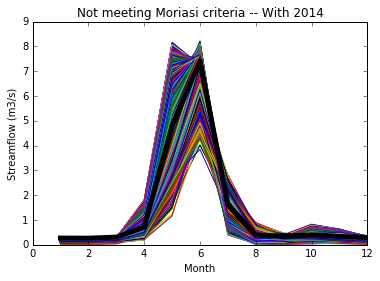

In [6]:
flip = junk.transpose()  # hydrograph plot of trials not meeting Moriasi criteria
plt.plot(range(1,13),flip.iloc[12:25,:])
plt.plot(usgs_mon.Month,usgs_mon.obs_streamflow, linewidth=5.0, color='black')
plt.xlabel("Month")
plt.ylabel("Streamflow (m3/s)")
plt.title("Not meeting Moriasi criteria -- With 2014")
plt.show()

In [7]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\BRUSH-GOOD'                     
all_files = glob.glob(os.path.join(path, "*sum*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
cstats = pd.concat(df_from_each_file, axis=0, ignore_index=True)
cstats.columns = ['trial','binf','Ds','Dsmax','Ws','Soil2','Soil3','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cstats = cstats.set_index('trial')
cstats
#print(cstats['PBIAS-v'].mean(),cstats['NSE-v'].mean(),cstats['RSR-v'].mean())

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
138.0,0.358567,0.01,27.891808,0.3,0.748178,0.748178,9.431808,0.750288,0.499712,8.709064,...,0.242122,0.703016,4.018471,7.226632,1.473378,0.311385,0.348883,0.401932,0.301571,0.220482
293.0,0.359066,0.01,9.875586,0.3,0.549448,0.549448,9.044545,0.759309,0.490602,7.732424,...,0.197237,0.768470,4.632338,7.280281,1.478928,0.175108,0.224578,0.311753,0.231967,0.171290
364.0,0.392269,0.01,18.153534,0.3,0.653706,0.653706,8.764530,0.751401,0.498597,7.802352,...,0.218922,0.748848,4.404373,7.333244,1.407257,0.234420,0.289080,0.361839,0.263130,0.187125
456.0,0.383275,0.01,7.580616,0.3,0.506625,0.506625,9.187942,0.760109,0.489787,7.846889,...,0.194591,0.800322,4.697289,7.229973,1.456915,0.161775,0.214930,0.311192,0.229423,0.166517
521.0,0.393231,0.01,13.143450,0.3,0.609607,0.609607,9.242369,0.756778,0.493175,8.128381,...,0.205843,0.763059,4.500932,7.285594,1.449871,0.201171,0.254719,0.335781,0.242212,0.171452
524.0,0.266779,0.01,12.935565,0.3,0.605096,0.605096,9.881467,0.754049,0.495934,8.688047,...,0.195264,0.676151,4.372128,7.399735,1.537415,0.191621,0.221606,0.290008,0.227948,0.181732
553.0,0.356420,0.01,14.129247,0.3,0.590220,0.590220,7.802587,0.750619,0.499381,6.636437,...,0.208824,0.759465,4.632206,7.424194,1.398081,0.198609,0.254075,0.333783,0.249993,0.185639
588.0,0.345008,0.01,8.078348,0.3,0.486840,0.486840,7.636511,0.753540,0.496447,6.241808,...,0.196591,0.800418,4.840455,7.375967,1.407273,0.152979,0.210631,0.308098,0.240182,0.183781
688.0,0.306622,0.01,15.378552,0.3,0.624414,0.624414,9.203195,0.750883,0.499116,8.124116,...,0.203757,0.699423,4.405128,7.431046,1.453590,0.207450,0.249168,0.317927,0.241620,0.184129


In [8]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\BRUSH-GOOD-no2014'                     
all_files = glob.glob(os.path.join(path, "*sum*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
cstats2 = pd.concat(df_from_each_file, axis=0, ignore_index=True)
cstats2.columns = ['trial','binf','Ds','Dsmax','Ws','Soil2','Soil3','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cstats2 = cstats2.set_index('trial')
cstats2.head(5)
#print(cstats['PBIAS-v'].mean(),cstats['NSE-v'].mean(),cstats['RSR-v'].mean())

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
103.0,0.212856,0.01,28.835468,0.3,0.653188,0.653188,2.551910,0.778025,0.471142,5.029597,...,0.232758,0.639945,4.428926,7.691363,1.358746,0.288029,0.310790,0.354086,0.291385,0.241781
108.0,0.379479,0.01,21.224871,0.3,0.625144,0.625144,2.896901,0.789826,0.458448,5.296441,...,0.229505,0.768612,4.629852,7.476984,1.317990,0.248240,0.306948,0.379157,0.282534,0.207138
111.0,0.361285,0.01,11.980758,0.3,0.631672,0.631672,8.298744,0.809758,0.436168,10.500133,...,0.194060,0.715594,4.263507,7.158817,1.557156,0.202865,0.237636,0.312555,0.223756,0.157742
113.0,0.103794,0.01,4.410999,0.3,0.458829,0.458829,9.976771,0.777406,0.471798,12.392989,...,0.158137,0.545099,4.071778,7.737039,1.411173,0.120647,0.099702,0.167151,0.185307,0.189633
116.0,0.283494,0.01,27.322050,0.3,0.828513,0.828513,9.843958,0.792121,0.455937,12.496594,...,0.233650,0.615300,3.528404,7.056250,1.648407,0.320761,0.331606,0.372047,0.286886,0.217653


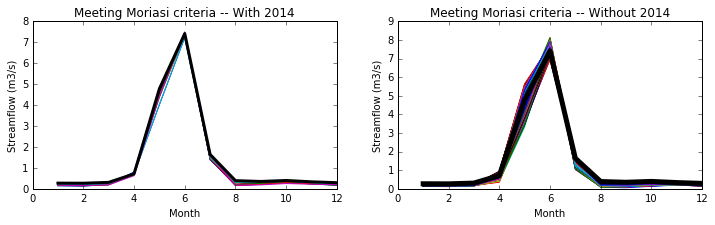

In [9]:
flip2 = cstats.transpose()  # hydrograph plot of simulations meeting Moriasi criteria
flip3 = cstats2.transpose()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].plot(range(1,13),flip2.iloc[12:25,:])
ax[0].plot(usgs_mon.Month,usgs_mon.obs_streamflow, linewidth=3.0, color='black')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Streamflow (m3/s)")
ax[1].plot(range(1,13),flip3.iloc[12:25,:])
ax[1].plot(usgs_mon.Month,usgs_mon.obs_streamflow, linewidth=5.0, color='black')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Streamflow (m3/s)")
ax[0].set_title("Meeting Moriasi criteria -- With 2014")
ax[1].set_title("Meeting Moriasi criteria -- Without 2014")
plt.show()

In [10]:
merged = pd.concat([junk,cstats])  # merge two data tables 
merged.head(5)

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.372239,0.01,2.182071,0.3,0.398981,0.398981,13.564506,0.735897,0.513910,12.806056,...,0.177092,0.787668,4.563770,7.146097,1.109795,0.131799,0.178563,0.283533,0.197403,0.133532
10.0,0.023172,0.01,16.992870,0.3,0.695098,0.695098,13.665601,0.718639,0.530435,12.630288,...,0.169279,0.353932,3.543168,7.690407,1.875295,0.209646,0.159418,0.175770,0.192256,0.208183
100.0,0.057031,0.01,20.215700,0.3,0.194122,0.194122,-13.057399,0.551249,0.669889,-15.534676,...,0.257288,1.400082,7.497473,7.483384,0.757054,0.161616,0.239219,0.565129,0.560171,0.339060
1000.0,0.217414,0.01,17.834274,0.3,0.883463,0.883463,19.214003,0.725806,0.523635,18.786251,...,0.191902,0.509159,3.022659,6.696421,1.966294,0.306456,0.250784,0.285019,0.220462,0.168829
101.0,0.188188,0.01,23.238502,0.3,0.344694,0.344694,-7.164296,0.634628,0.604460,-8.782326,...,0.247461,1.025687,6.611597,7.703414,0.916636,0.214467,0.266808,0.425260,0.419450,0.319259


In [11]:
merged2 = pd.concat([junk2,cstats2])  # merge two data tables 
merged2.head(5)

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.372239,0.01,2.182071,0.3,0.398981,0.398981,10.286513,0.784883,0.463808,12.806056,...,0.177092,0.787668,4.563770,7.146097,1.109795,0.131799,0.178563,0.283533,0.197403,0.133532
10.0,0.023172,0.01,16.992870,0.3,0.695098,0.695098,10.320070,0.764010,0.485788,12.630288,...,0.169279,0.353932,3.543168,7.690407,1.875295,0.209646,0.159418,0.175770,0.192256,0.208183
100.0,0.057031,0.01,20.215700,0.3,0.194122,0.194122,-17.258488,0.585232,0.644025,-15.534676,...,0.257288,1.400082,7.497473,7.483384,0.757054,0.161616,0.239219,0.565129,0.560171,0.339060
1000.0,0.217414,0.01,17.834274,0.3,0.883463,0.883463,16.130987,0.774246,0.475136,18.786251,...,0.191902,0.509159,3.022659,6.696421,1.966294,0.306456,0.250784,0.285019,0.220462,0.168829
101.0,0.188188,0.01,23.238502,0.3,0.344694,0.344694,-11.146067,0.673228,0.571640,-8.782326,...,0.247461,1.025687,6.611597,7.703414,0.916636,0.214467,0.266808,0.425260,0.419450,0.319259


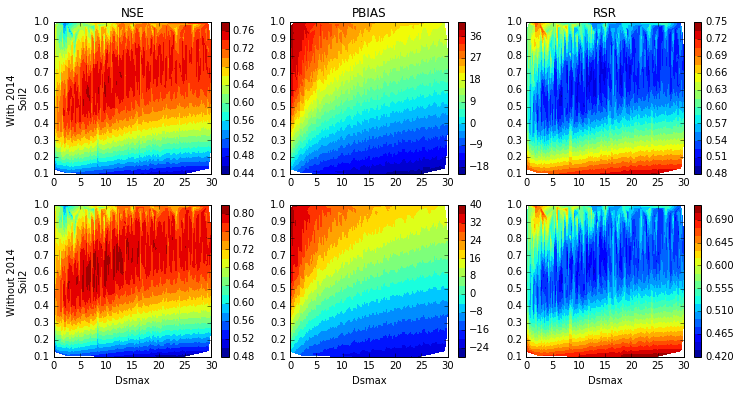

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
img1 = axes[0,0].tricontourf(merged['Dsmax'],merged['Soil2'],merged['NSE-c'], 20)
img2 = axes[0,1].tricontourf(merged['Dsmax'],merged['Soil2'],merged['PBIAS-c'], 20)
img3 = axes[0,2].tricontourf(merged['Dsmax'],merged['Soil2'],merged['RSR-c'], 20)
img4 = axes[1,0].tricontourf(merged2['Dsmax'],merged2['Soil2'],merged2['NSE-c'], 20)
img5 = axes[1,1].tricontourf(merged2['Dsmax'],merged2['Soil2'],merged2['PBIAS-c'], 20)
img6 = axes[1,2].tricontourf(merged2['Dsmax'],merged2['Soil2'],merged2['RSR-c'], 20)
axes[0,0].set_ylabel('With 2014 \nSoil2')
axes[1,0].set_ylabel('Without 2014 \nSoil2')
axes[1,0].set_xlabel('Dsmax')
axes[1,1].set_xlabel('Dsmax')
axes[1,2].set_xlabel('Dsmax')
axes[0,0].set_title('NSE')
axes[0,1].set_title('PBIAS')
axes[0,2].set_title('RSR')
fig.colorbar(img1,ax=axes[0,0])
fig.colorbar(img2,ax=axes[0,1])
fig.colorbar(img3,ax=axes[0,2])
fig.colorbar(img4,ax=axes[1,0])
fig.colorbar(img5,ax=axes[1,1])
fig.colorbar(img6,ax=axes[1,2])
plt.show()

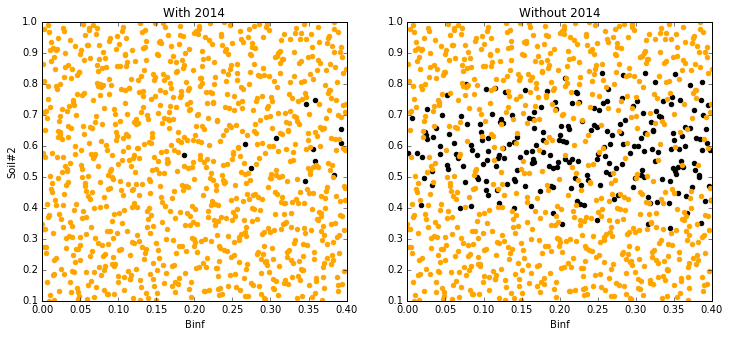

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          # orange = not meeting Moriasi criteria
axes[0].scatter(cstats['binf'],cstats['Soil2'],color="black")        # black = meeting Moriaisi criteria
axes[0].scatter(junk['binf'],junk['Soil2'],color="orange")
axes[1].scatter(cstats2['binf'],cstats2['Soil2'],color="black")
axes[1].scatter(junk2['binf'],junk2['Soil2'],color="orange")
axes[0].set_xlim(0, 0.4)
axes[0].set_ylim(0.1,1.0)
axes[1].set_xlim(0, 0.4)
axes[1].set_ylim(0.1,1.0)
axes[0].set_xlabel('Binf')
axes[1].set_xlabel('Binf')
axes[0].set_ylabel('Soil#2')
axes[0].set_title("With 2014")
axes[1].set_title("Without 2014")
plt.show()

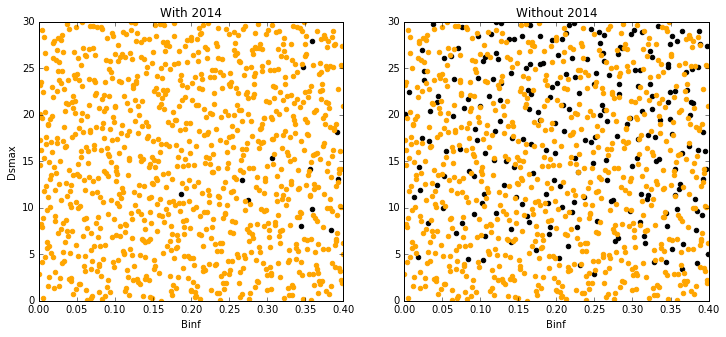

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].scatter(cstats['binf'],cstats['Dsmax'],color="black")
axes[0].scatter(junk['binf'],junk['Dsmax'],color="orange")
axes[1].scatter(cstats2['binf'],cstats2['Dsmax'],color="black")
axes[1].scatter(junk2['binf'],junk2['Dsmax'],color="orange")
axes[0].set_xlim(0, 0.4)
axes[0].set_ylim(0,30)
axes[1].set_xlim(0, 0.4)
axes[1].set_ylim(0,30)
axes[0].set_xlabel('Binf')
axes[0].set_ylabel('Dsmax')
axes[1].set_xlabel('Binf')
axes[0].set_title("With 2014")
axes[1].set_title("Without 2014")
plt.show()

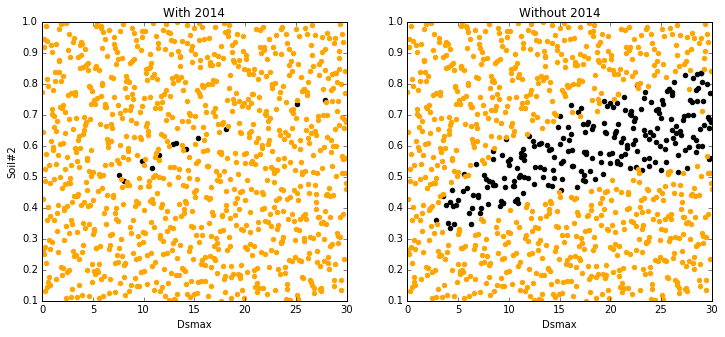

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].scatter(cstats['Dsmax'],cstats['Soil2'],color="black")
axes[0].scatter(junk['Dsmax'],junk['Soil2'],color="orange")
axes[1].scatter(cstats2['Dsmax'],cstats2['Soil2'],color="black")
axes[1].scatter(junk2['Dsmax'],junk2['Soil2'],color="orange")
axes[0].set_xlim(0, 30)
axes[0].set_ylim(0.1,1.0)
axes[1].set_xlim(0, 30)
axes[1].set_ylim(0.1,1.0)
axes[0].set_xlabel('Dsmax')
axes[0].set_ylabel('Soil#2')
axes[1].set_xlabel('Dsmax')
axes[0].set_title("With 2014")
axes[1].set_title("Without 2014")
plt.show()

In [16]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\ROCK-GOOD'# trials meeting Moriasi's "very good" criteria for calibration
all_files = glob.glob(os.path.join(path, "*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
cstatsR = pd.concat(df_from_each_file, axis=0, ignore_index=True)
cstatsR.columns = ['trial','binf','Dsmax','Soil2','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cstatsR = cstatsR.set_index('trial')
cstatsR.head(5)

,binf,Dsmax,Soil2,PBIAS-c,NSE-c,RSR-c,PBIAS-v,NSE-v,RSR-v,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
102.0,0.166484,17.623524,0.519532,5.003445,0.767006,0.482695,5.753457,0.850750,0.386329,0.269055,...,0.325594,1.044129,6.733893,12.467240,3.066044,0.373375,0.360209,0.425830,0.365131,0.309221
109.0,0.315461,14.435758,0.557250,7.497526,0.775423,0.473895,8.276393,0.847582,0.390407,0.231010,...,0.336081,1.130210,6.397809,11.986072,3.157586,0.380880,0.391193,0.466074,0.343285,0.258095
111.0,0.201339,26.303730,0.605512,5.729982,0.771804,0.477698,6.762760,0.851117,0.385854,0.301889,...,0.357120,0.986185,6.140393,12.348084,3.110559,0.485329,0.472654,0.510736,0.411460,0.337279
112.0,0.367487,16.764557,0.509629,3.855023,0.765715,0.484030,4.625092,0.847830,0.390089,0.246754,...,0.365445,1.264379,7.029295,12.278750,2.881391,0.374775,0.436362,0.522953,0.383360,0.282560
115.0,0.240156,15.850341,0.537553,6.255326,0.772023,0.477469,7.015679,0.849829,0.387519,0.249103,...,0.331291,1.089522,6.554074,12.240486,3.112301,0.374572,0.376463,0.446858,0.352624,0.281670


In [17]:
cstatsR2 = pd.read_csv('ROCK-GOOD-no2014.txt', header=None,delim_whitespace=True) 
cstatsR2.columns = ['rsr-C','pbias-C','NSE-C','rsr-V','pbias-V','NSE-V','trial','binf','Dsmax','Soil2']
cstatsR2.head(5)

,rsr-C,pbias-C,NSE-C,rsr-V,pbias-V,NSE-V,trial,binf,Dsmax,Soil2
0,0.421034,1.103070,0.822730,0.386329,5.753456,0.850750,102.0,0.1665,17.6235,0.5195
1,0.409765,3.728592,0.832093,0.390408,8.276385,0.847582,109.0,0.3155,14.4358,0.5572
2,0.414977,1.920328,0.827794,0.385854,6.762759,0.851117,111.0,0.2013,26.3037,0.6055
3,0.422863,-0.014963,0.821187,0.390089,4.625089,0.847831,112.0,0.3675,16.7646,0.5096
4,0.414438,2.423240,0.828242,0.387519,7.015677,0.849829,115.0,0.2402,15.8503,0.5376


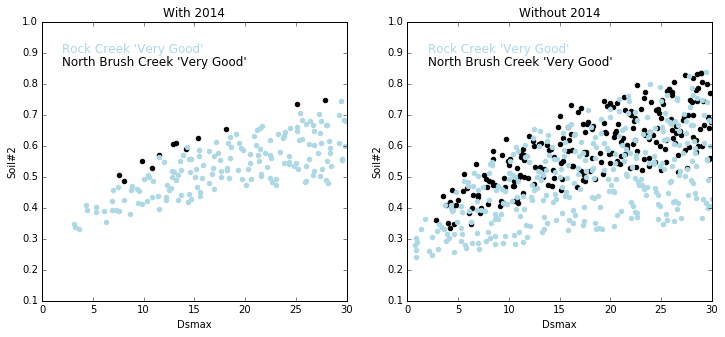

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].scatter(cstats['Dsmax'],cstats['Soil2'],color="black")
axes[0].scatter(cstatsR['Dsmax'],cstatsR['Soil2'],color="lightblue")
axes[1].scatter(cstats2['Dsmax'],cstats2['Soil2'],color="black")
axes[1].scatter(cstatsR2['Dsmax'],cstatsR2['Soil2'],color="lightblue")
for x in (0,1):
    axes[x].set_xlim(0, 30)
    axes[x].set_ylim(0.1,1.0)
    axes[x].set_xlabel('Dsmax')
    axes[x].set_ylabel('Soil#2')
    axes[x].text(2,0.9,"Rock Creek 'Very Good'",color="lightblue",size=12)
    axes[x].text(2,0.86,"North Brush Creek 'Very Good'",color="black",size=12)    
axes[0].set_title("With 2014")
axes[1].set_title("Without 2014")
plt.show()

In [36]:
rock_best = cstatsR2[(cstatsR2['rsr-V']<=0.5)&(cstatsR2['NSE-V']>=0.75)&(cstatsR2['pbias-V']<=10)&
                     (cstatsR2['pbias-V']>=-10)].nlargest(15, 'NSE-V')
rock_best

,rsr-C,pbias-C,NSE-C,rsr-V,pbias-V,NSE-V,trial,binf,Dsmax,Soil2
52,0.424440,5.366584,0.819851,0.380654,9.890038,0.855103,435.0,0.0765,5.3142,0.4042
277,0.442308,2.862754,0.804364,0.382020,7.437394,0.854061,67.0,0.0358,4.9117,0.3555
43,0.432786,-0.087205,0.812696,0.382719,4.811245,0.853526,360.0,0.0255,29.5438,0.5569
25,0.427683,0.474131,0.817088,0.383326,5.283267,0.853061,269.0,0.0810,24.2817,0.5468
141,0.427437,1.317605,0.817298,0.383358,6.193823,0.853036,922.0,0.0471,27.1421,0.5776
40,0.438948,4.220315,0.807325,0.383390,8.871115,0.853012,347.0,0.1326,3.2785,0.3390
153,0.422715,-0.056392,0.821312,0.383544,4.776185,0.852894,954.0,0.1731,26.2686,0.5582
152,0.422945,1.498089,0.821117,0.383676,6.386661,0.852793,953.0,0.0849,28.3222,0.5944
96,0.422030,1.402104,0.821890,0.383801,6.175497,0.852697,730.0,0.1242,22.5458,0.5605
20,0.432520,-1.445433,0.812926,0.384109,3.413577,0.852460,239.0,0.1053,27.5929,0.5266


In [37]:
brush_best = cstats2[(cstats2['RSR-v']<=0.5)&(cstats2['NSE-v']>=0.75)&(cstats2['PBIAS-v']<=10)&
                     (cstats2['PBIAS-v']>=-10)].nlargest(15,'NSE-v')
brush_best

,binf,Ds,Dsmax,Ws,Soil2,Soil3,PBIAS-c,NSE-c,RSR-c,PBIAS-v,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
456.0,0.383275,0.01,7.580616,0.3,0.506625,0.506625,5.794279,0.808733,0.437341,7.846889,...,0.194591,0.800322,4.697289,7.229973,1.456915,0.161775,0.214930,0.311192,0.229423,0.166517
293.0,0.359066,0.01,9.875586,0.3,0.549448,0.549448,5.651608,0.807664,0.438562,7.732424,...,0.197237,0.768470,4.632338,7.280281,1.478928,0.175108,0.224578,0.311753,0.231967,0.171290
665.0,0.320953,0.01,11.370155,0.3,0.591042,0.591042,6.722319,0.807192,0.439099,8.860582,...,0.195258,0.718704,4.432176,7.290333,1.531597,0.187674,0.224882,0.301641,0.226675,0.170847
521.0,0.393231,0.01,13.143450,0.3,0.609607,0.609607,5.892213,0.804807,0.441806,8.128381,...,0.205843,0.763059,4.500932,7.285594,1.449871,0.201171,0.254719,0.335781,0.242212,0.171452
588.0,0.345008,0.01,8.078348,0.3,0.486840,0.486840,4.168188,0.801489,0.445545,6.241808,...,0.196591,0.800418,4.840455,7.375967,1.407273,0.152979,0.210631,0.308098,0.240182,0.183781
765.0,0.274536,0.01,10.805280,0.3,0.528823,0.528823,4.151032,0.798628,0.448745,6.251750,...,0.196344,0.733557,4.739679,7.468789,1.452253,0.165930,0.210105,0.292706,0.239652,0.194947
912.0,0.206780,0.01,10.105203,0.3,0.556786,0.556786,6.889073,0.801681,0.445330,8.951737,...,0.183862,0.644476,4.373583,7.435625,1.595902,0.166809,0.182757,0.251722,0.215658,0.187018
364.0,0.392269,0.01,18.153534,0.3,0.653706,0.653706,5.420281,0.798898,0.448444,7.802352,...,0.218922,0.748848,4.404373,7.333244,1.407257,0.234420,0.289080,0.361839,0.263130,0.187125
553.0,0.356420,0.01,14.129247,0.3,0.590220,0.590220,4.391981,0.798001,0.449442,6.636437,...,0.208824,0.759465,4.632206,7.424194,1.398081,0.198609,0.254075,0.333783,0.249993,0.185639


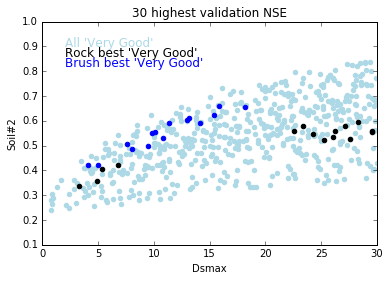

In [31]:
plt.scatter(cstats2['Dsmax'],cstats2['Soil2'],color="lightblue")
plt.scatter(cstatsR2['Dsmax'],cstatsR2['Soil2'],color="lightblue")
plt.scatter(rock_best['Dsmax'],rock_best['Soil2'],color="black")
plt.scatter(brush_best['Dsmax'],brush_best['Soil2'],color="blue")
plt.xlim(0, 30)
plt.ylim(0.1,1.0)
plt.xlabel('Dsmax')
plt.ylabel('Soil#2')
plt.text(2,0.9,"All 'Very Good'",color="lightblue",size=12)
plt.text(2,0.86,"Rock best 'Very Good'",color="black",size=12)  
plt.text(2,0.82,"Brush best 'Very Good'",color="blue",size=12)
plt.title("30 highest validation NSE")
plt.show()